Grade=90/100

Abstract

In this lab we first accessed and analyzed data.  In the second part of the lab, we examined and fixed the image astrometry, and then photometrically calibrated the image in order to create a "science ready" image.

Introduction

In the lab, we utilized flat and bias frames.  A flat frame is an exposure of the CCD.  A bias frame is an exposure with no light.  These helped us calibrate the science frame to reduce noise.

In [3]:
#Methods and Results
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

root = '/Users/catclark/Desktop/lsa-ast361/Work/catclark/'

bias1 = fits.getdata(root + 'kp288925.fits.fz')

bias2 = fits.getdata(root + 'kp288927.fits.fz')

bias3 = fits.getdata(root + 'kp288929.fits.fz')

bias4 = fits.getdata(root + 'kp288931.fits.fz')

bias5 = fits.getdata(root + 'kp288933.fits.fz')

bias6 = fits.getdata(root + 'kp288935.fits.fz')

bias7 = fits.getdata(root + 'kp288936.fits.fz')

bias8 = fits.getdata(root + 'kp288938.fits.fz')

bias9 = fits.getdata(root + 'kp288940.fits.fz')

bias10 = fits.getdata(root + 'kp288943.fits.fz')

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


2476.94533696
6.74412007604


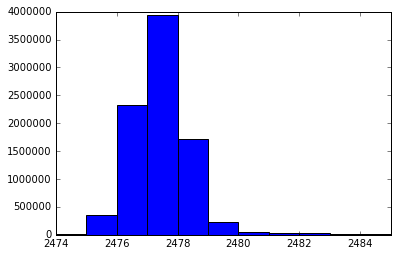

IOError: File 'master_bias' already exists.

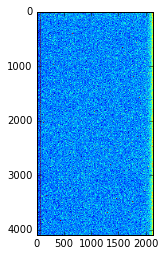

In [4]:
sum_bias = bias1 + bias2 + bias3 + bias4 + bias5 + bias6 + bias7 + bias8 + bias9 + bias10
average_bias = sum_bias / 10
bias_mean = np.mean(average_bias)
bias_std = np.std(average_bias)
print bias_mean
print bias_std

bias_hist = []
for a in average_bias:
    for b in a:
        bias_hist.append(b)

plt.hist(bias_hist, bins = range(min(bias_hist), max(bias_hist) + 1, 1))
plt.xlim(2474,2485)
plt.show()

plt.imshow(average_bias, vmin = 2474, vmax = 2485)

fits.writeto("master_bias", average_bias)

In [ ]:
flat1 = fits.getdata(root + 'kp288948.fits.fz') - average_bias

flat2 = fits.getdata(root + 'kp288950.fits.fz') - average_bias

flat3 = fits.getdata(root + 'kp288952.fits.fz') - average_bias

flat4 = fits.getdata(root + 'kp288953.fits.fz') - average_bias

flat5 = fits.getdata(root + 'kp288954.fits.fz') - average_bias

flat6 = fits.getdata(root + 'kp288956.fits.fz') - average_bias

flat7 = fits.getdata(root + 'kp288957.fits.fz') - average_bias

flat8 = fits.getdata(root + 'kp288959.fits.fz') - average_bias

flat9 = fits.getdata(root + 'kp288961.fits.fz') - average_bias

flat10 = fits.getdata(root + 'kp288963.fits.fz') - average_bias

In [ ]:
sum_flat = flat1 + flat2 + flat3 + flat4 + flat5 + flat6 + flat7 + flat8 + flat9 + flat10
average_flat = sum_flat / 10
average_flat = np.delete(average_flat, np.s_[:99], axis = 1)
flat_mean = np.mean(average_flat)
flat_std = np.std(average_flat)
print flat_mean
print flat_std

flat_hist = []
for a in average_flat:
    for b in a:
        flat_hist.append(b)

plt.hist(flat_hist, bins = range(min(flat_hist), max(flat_hist) + 1, 1))
plt.xlim(1100,2100)
plt.show()

plt.imshow(average_flat)
plt.show()

fits.writeto("master_flat", average_flat)

In [ ]:
mast_cal = fits.getdata(root + 'tu941164.fits.fz 2')

a = np.hstack(mast_cal)
plt.hist(a, bins = 500)
plt.xlim(6000, 9000)
plt.show()

plt.imshow(mast_cal)
plt.show()

In [ ]:
science = (fits.getdata(root + 'kp289010.fits.fz') - average_bias)
science = np.delete(science, np.s_[:99], axis = 1)
science_cal = science / flat_mean

a = np.hstack(science_cal)
plt.hist(a, bins = 500)
plt.xlim(0, 2)
plt.show()

plt.imshow(science_cal, vmin = 0, vmax = 2)
plt.show()

fits.writeto("science_cal", science_cal)

In [ ]:
inst_cal = fits.getdata(root + 'tu941456.fits.fz')

a = np.hstack(inst_cal)
plt.hist(a, bins = 500)
plt.xlim(10, 13.5)
plt.show()

plt.imshow(inst_cal, vmin = 10, vmax = 13.5)
plt.show()

fits.writeto("inst_cal", inst_cal)

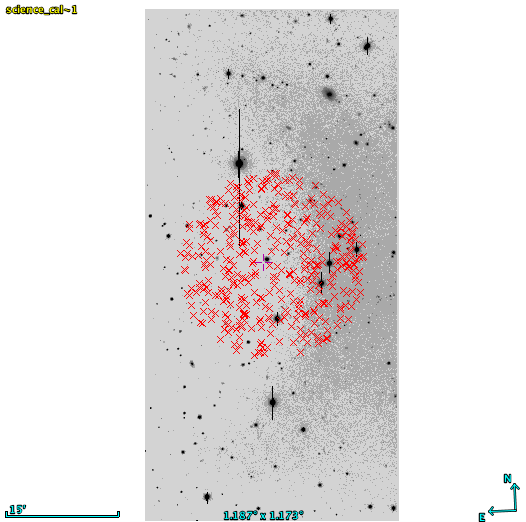

In [7]:
#Aladin image with catalog objects
from IPython.display import Image
Image(filename='Part1a.png')
#These images do not match because the image has no location data.

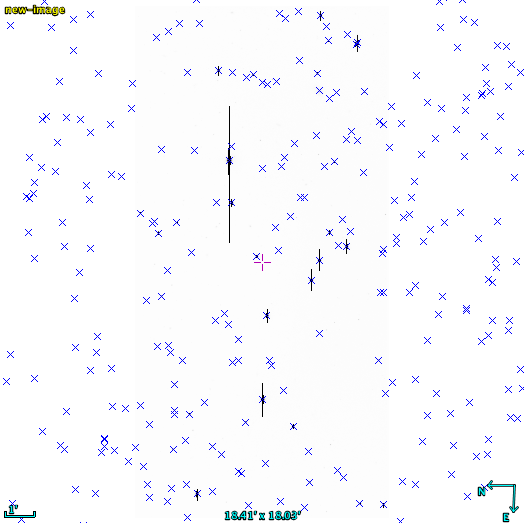

In [8]:
#new-image.fits
from IPython.display import Image
Image(filename='Part2c.png')
#The new and old WRC systems, which are important for adding location data to the image, are different by 16.58'.

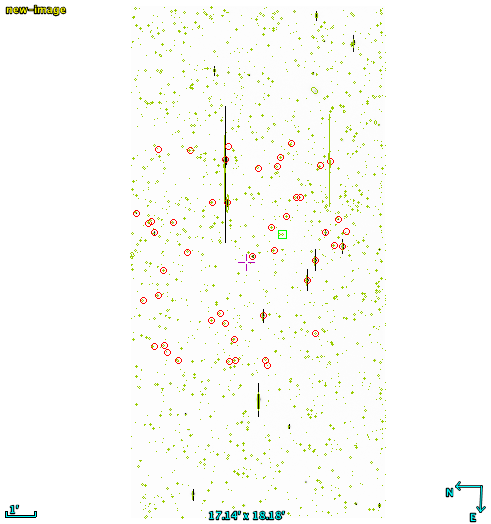

In [9]:
#astrometrically calibrated image
from IPython.display import Image
Image(filename='Part3b.png')
#There are a fair number of astronomical sources in this image.

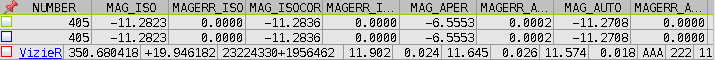

In [10]:
#data types
from IPython.display import Image
Image(filename='Part3c.png')
#It appears that the magnitudes are correct, because the values are the same.

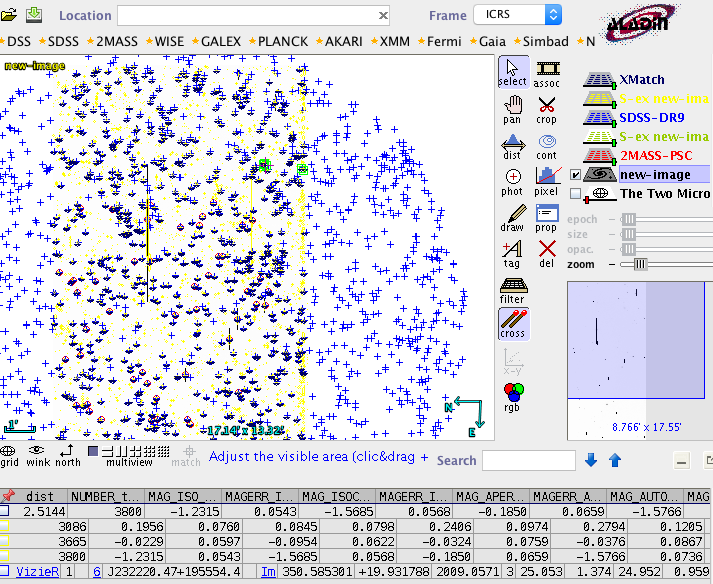

In [11]:
#cross match
from IPython.display import Image
Image(filename='Part4b.png')
#The positions and magnitudes are similar.

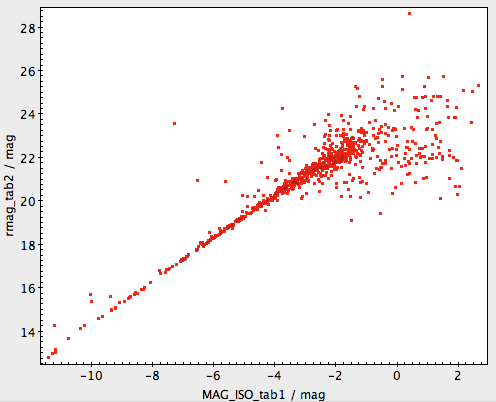

In [12]:
#topcat
from IPython.display import Image
Image(filename='Part4c.png')
#We used the same filter from part 1.  abs(x-y)=24

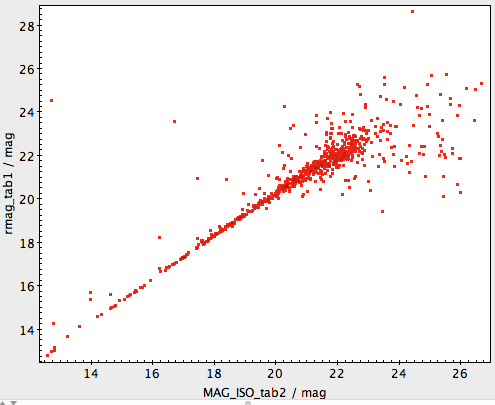

In [13]:
#topcat2
from IPython.display import Image
Image(filename='Part4c2.png')
#abs(x-y)=0

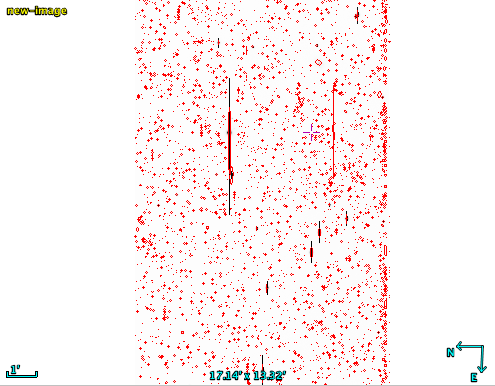

In [14]:
#final image
from IPython.display import Image
Image(filename='Part4e.png')
#Conclusion: It is a long process to calibrate a "science ready" image, but the results are astonishing.